Archivo combinado guardado: D:/ls_feed/data_drive/TS1_combinado.csv
Forma del dataset: (1059, 4)
Rango temporal: 2025-07-15 11:41:57 a 2025-08-06 11:31:16
Archivo combinado guardado: D:/ls_feed/data_drive/TS2_combinado.csv
Forma del dataset: (1059, 4)
Rango temporal: 2025-07-15 11:17:06 a 2025-08-06 11:34:11
Archivo combinado guardado: D:/ls_feed/data_drive/TS3_combinado.csv
Forma del dataset: (730, 4)
Rango temporal: 2000-01-01 00:00:12 a 2000-01-16 04:18:41

Estructura de TS1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mac          1059 non-null   object 
 1   time         1059 non-null   object 
 2   moisture     1059 non-null   float64
 3   temperature  1059 non-null   float64
dtypes: float64(2), object(2)
memory usage: 33.2+ KB
None

Primeras filas de TS1:
                 mac                 time  moisture  temperature
0  70:B8:F6

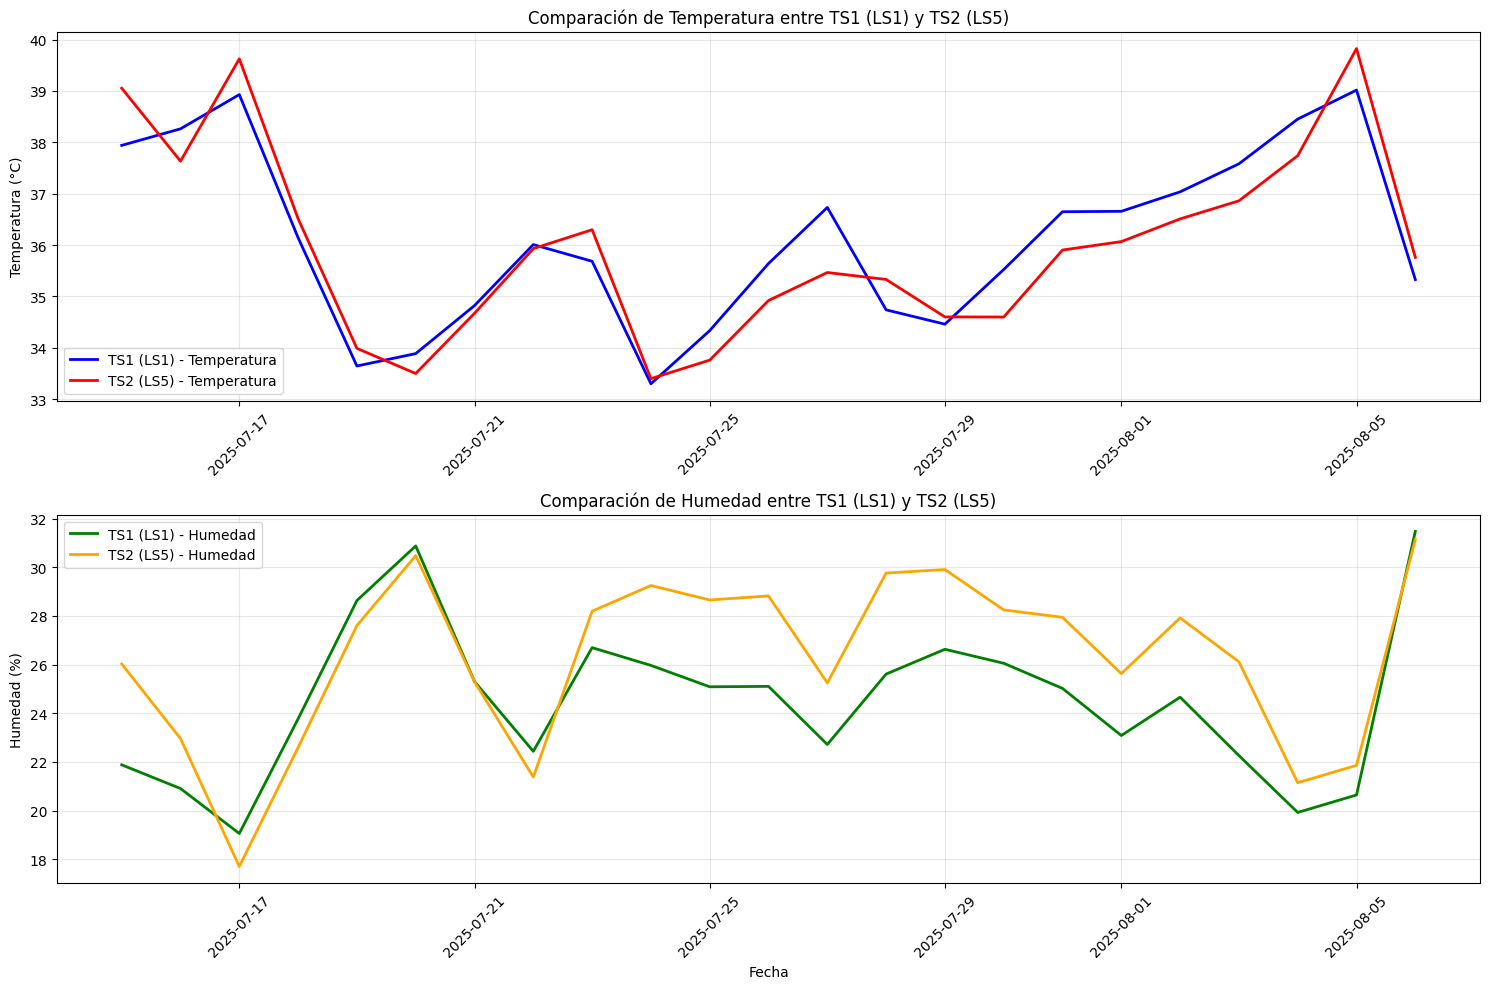


Correlación de temperatura entre TS1 y TS2: 0.935
Correlación de humedad entre TS1 y TS2: 0.844

Estadísticas TS1 - Temperatura:
count    23.000000
mean     36.119667
std       1.700244
min      33.297917
25%      34.779167
50%      36.008333
75%      37.308333
max      39.016667
Name: temperature, dtype: float64

Estadísticas TS2 - Temperatura:
count    23.000000
mean     35.997270
std       1.833050
min      33.397917
25%      34.635417
50%      35.902083
75%      36.686458
max      39.825000
Name: temperature, dtype: float64

Estadísticas TS1 - Humedad:
count    23.000000
mean     24.512982
std       3.186994
min      19.058333
25%      22.347917
50%      25.020833
75%      26.010417
max      31.476923
Name: moisture, dtype: float64

Estadísticas TS2 - Humedad:
count    23.000000
mean     26.255694
std       3.521506
min      17.702083
25%      24.103125
50%      27.604167
75%      28.738763
max      31.140000
Name: moisture, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from datetime import datetime

# Configuración de estilo para gráficos
plt.style.use('default')

# 1. Combinar archivos CSV en cada carpeta TS1, TS2, TS3
carpetas = [
    "D:/ls_feed/data_drive/TS1",
    "D:/ls_feed/data_drive/TS2",
    "D:/ls_feed/data_drive/TS3"
]

for carpeta in carpetas:
    archivos = [os.path.join(carpeta, f) for f in os.listdir(carpeta) if f.endswith('.csv')]
    
    if not archivos:
        print(f"No se encontraron archivos CSV en {carpeta}")
        continue
        
    datos_combinados = []
    for archivo in archivos:
        try:
            df = pd.read_csv(archivo, sep=';')
            datos_combinados.append(df)
        except Exception as e:
            print(f"Error leyendo {archivo}: {e}")
    
    if datos_combinados:
        df_final = pd.concat(datos_combinados, ignore_index=True)
        
        # Limpieza y conversión de datos
        # Convertir time a datetime
        df_final['time'] = pd.to_datetime(df_final['time'], errors='coerce')
        
        # Convertir moisture y temperature a numéricos, manejando errores
        df_final['moisture'] = pd.to_numeric(df_final['moisture'], errors='coerce')
        df_final['temperature'] = pd.to_numeric(df_final['temperature'], errors='coerce')
        
        # Eliminar filas con valores nulos en time
        df_final = df_final.dropna(subset=['time'])
        
        df_final = df_final.sort_values('time')
        
        nombre_salida = f"{carpeta}_combinado.csv"
        df_final.to_csv(nombre_salida, sep=';', index=False)
        print(f"Archivo combinado guardado: {nombre_salida}")
        print(f"Forma del dataset: {df_final.shape}")
        print(f"Rango temporal: {df_final['time'].min()} a {df_final['time'].max()}")

# 2. Cargar datos combinados de TS1 y TS2
try:
    ts1 = pd.read_csv('D:/ls_feed/data_drive/TS1_combinado.csv', sep=';')
    ts2 = pd.read_csv('D:/ls_feed/data_drive/TS2_combinado.csv', sep=';')
    
    # Verificar estructura de los datos
    print("\nEstructura de TS1:")
    print(ts1.info())
    print("\nPrimeras filas de TS1:")
    print(ts1.head())
    
    print("\nEstructura de TS2:")
    print(ts2.info())
    print("\nPrimeras filas de TS2:")
    print(ts2.head())
    
    # Convertir time a datetime y ordenar
    ts1['time'] = pd.to_datetime(ts1['time'])
    ts2['time'] = pd.to_datetime(ts2['time'])
    ts1 = ts1.sort_values('time')
    ts2 = ts2.sort_values('time')
    
    # Resampleo diario (promedio) para suavizar datos - especificando columnas numéricas
    ts1_daily = ts1.set_index('time')[['moisture', 'temperature']].resample('D').mean().reset_index()
    ts2_daily = ts2.set_index('time')[['moisture', 'temperature']].resample('D').mean().reset_index()
    
    # 3. Gráficos comparativos de temperatura y humedad
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Gráfico de temperatura
    ax1.plot(ts1_daily['time'], ts1_daily['temperature'], 
             label='TS1 (LS1) - Temperatura', linewidth=2, color='blue')
    ax1.plot(ts2_daily['time'], ts2_daily['temperature'], 
             label='TS2 (LS5) - Temperatura', linewidth=2, color='red')
    ax1.set_ylabel('Temperatura (°C)')
    ax1.set_title('Comparación de Temperatura entre TS1 (LS1) y TS2 (LS5)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Gráfico de humedad
    ax2.plot(ts1_daily['time'], ts1_daily['moisture'], 
             label='TS1 (LS1) - Humedad', linewidth=2, color='green')
    ax2.plot(ts2_daily['time'], ts2_daily['moisture'], 
             label='TS2 (LS5) - Humedad', linewidth=2, color='orange')
    ax2.set_ylabel('Humedad (%)')
    ax2.set_xlabel('Fecha')
    ax2.set_title('Comparación de Humedad entre TS1 (LS1) y TS2 (LS5)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 4. Análisis de correlación
    # Unir datos por fecha para correlación
    merged_data = pd.merge(ts1_daily, ts2_daily, on='time', suffixes=('_ts1', '_ts2'))
    
    correlacion_temp = merged_data['temperature_ts1'].corr(merged_data['temperature_ts2'])
    correlacion_humedad = merged_data['moisture_ts1'].corr(merged_data['moisture_ts2'])
    
    print(f"\nCorrelación de temperatura entre TS1 y TS2: {correlacion_temp:.3f}")
    print(f"Correlación de humedad entre TS1 y TS2: {correlacion_humedad:.3f}")
    
    # Estadísticas descriptivas
    print("\nEstadísticas TS1 - Temperatura:")
    print(ts1_daily['temperature'].describe())
    print("\nEstadísticas TS2 - Temperatura:")
    print(ts2_daily['temperature'].describe())
    print("\nEstadísticas TS1 - Humedad:")
    print(ts1_daily['moisture'].describe())
    print("\nEstadísticas TS2 - Humedad:")
    print(ts2_daily['moisture'].describe())
    
except Exception as e:
    print(f"Error al procesar los datos: {e}")
    print("Verifica que los archivos combinados se hayan creado correctamente")
    
    # Si hay error, mostrar qué archivos hay en las carpetas
    for carpeta in carpetas[:2]:  # Solo TS1 y TS2
        print(f"\nArchivos en {carpeta}:")
        try:
            archivos = os.listdir(carpeta)
            csv_files = [f for f in archivos if f.endswith('.csv')]
            for archivo in csv_files:
                print(f"  - {archivo}")
        except Exception as list_error:
            print(f"  Error al listar archivos: {list_error}")

Hecho. Carpeta: data_drive\analysis_outputs
CCF resumen: {'lag_star_hours': 1, 'cc_at_lag_star': 0.16065063578900948, 'sig_threshold': 0.09365242258322934}


C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\1106549951.py:90: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  s["datehour"] = s["midpoint"].dt.floor("H")
C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\1106549951.py:97: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  env = (ts.set_index("time").groupby("ls").resample("1H")
C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\1106549951.py:98: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .agg(temperature=("temperature","mean"),
C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\1106549951.py:100: FutureWarning: 'H' is deprecated and will be r

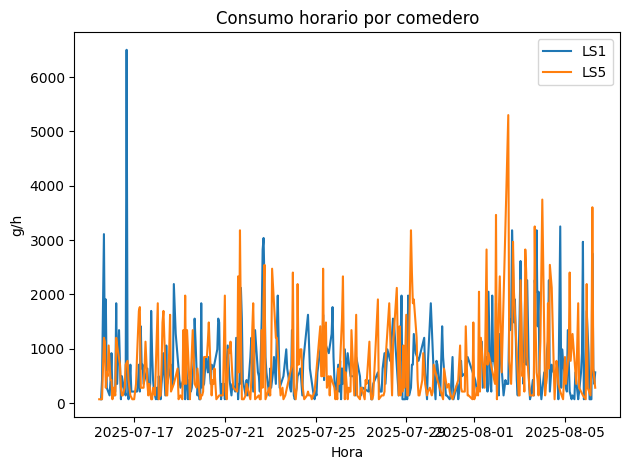

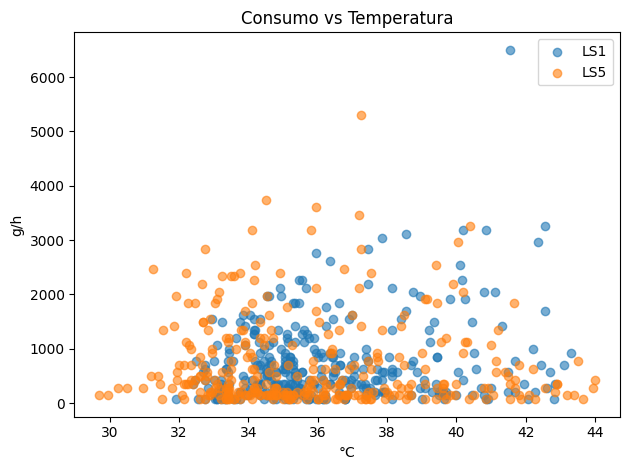

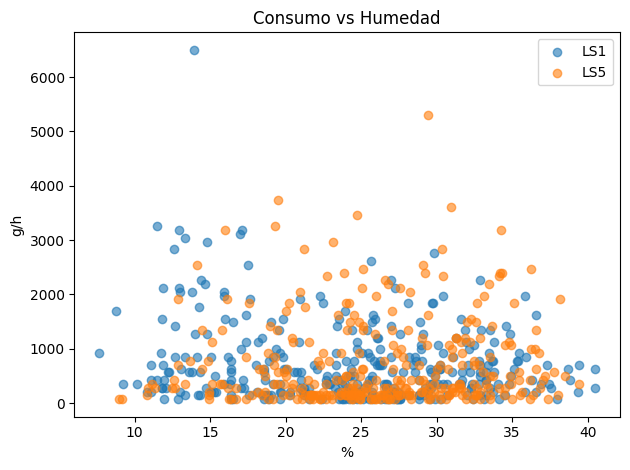

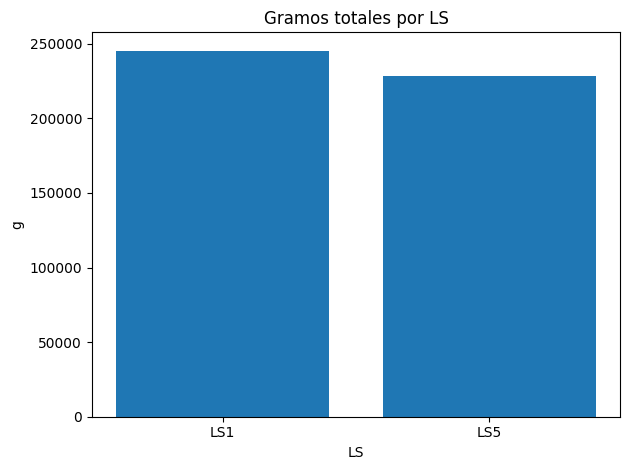

In [5]:
# -*- coding: utf-8 -*-
# Requiere: pandas, numpy, matplotlib, statsmodels
import pandas as pd, numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
from statsmodels.tsa.stattools import ccf

DATA_DIR = Path("data_drive")  # cambia si procede

# ----------------------------
# Utilidades
# ----------------------------
def _tz_naive(s: pd.Series) -> pd.Series:
    s = pd.to_datetime(s, errors="coerce")
    try:
        return s.dt.tz_convert(None)
    except Exception:
        try:
            return s.dt.tz_localize(None)
        except Exception:
            return s

def load_ts(fp: Path, ls_label: str) -> pd.DataFrame:
    df = pd.read_csv(fp, sep=";")
    df.columns = [c.strip().lower() for c in df.columns]
    ren = {}
    for c in df.columns:
        if "mac" in c: ren[c] = "mac"
        elif c in ("time","timestamp","datetime"): ren[c] = "time"
        elif "moist" in c: ren[c] = "moisture"
        elif "temp" in c: ren[c] = "temperature"
    df = df.rename(columns=ren)
    df["time"] = _tz_naive(df["time"])
    for c in ("moisture","temperature"):
        df[c] = pd.to_numeric(df[c], errors="coerce")
    df["ls"] = ls_label
    return df.dropna(subset=["time"]).sort_values("time")

def load_sessions(fp: Path, ls_label: str) -> pd.DataFrame:
    df = pd.read_csv(fp)
    df.columns = [c.strip().lower() for c in df.columns]
    ren = {}
    for c in df.columns:
        if c.startswith("start"): ren[c] = "start"
        if c.startswith("end"): ren[c] = "end"
        if "duration" in c: ren[c] = "duration_min"
        if "gram" in c: ren[c] = "grams"
        if "rate" in c: ren[c] = "rate_g_per_min"
    df = df.rename(columns=ren)
    df["start"] = _tz_naive(df["start"])
    df["end"]   = _tz_naive(df["end"])
    df = df.dropna(subset=["start","end"]).sort_values("start").reset_index(drop=True)
    if "duration_min" not in df or df["duration_min"].isna().any():
        df["duration_min"] = (df["end"] - df["start"]).dt.total_seconds()/60.0
    df["grams"] = pd.to_numeric(df.get("grams", np.nan), errors="coerce")
    df["rate_g_per_min"] = pd.to_numeric(df.get("rate_g_per_min", np.nan), errors="coerce")
    df["ls"] = ls_label
    df["session_id"] = (df.index + 1).astype(int)
    df["midpoint"] = df["start"] + (df["end"] - df["start"])/2
    return df

def load_refills(fp: Path, ls_label: str) -> pd.DataFrame:
    df = pd.read_csv(fp)
    df.columns = [c.strip().lower() for c in df.columns]
    ren = {}
    for c in df.columns:
        if c in ("time","timestamp","datetime"): ren[c] = "time"
        if "jump_mm" in c: ren[c] = "jump_mm"
        if "jump_ml" in c: ren[c] = "jump_ml"
        if "jump_g"  in c: ren[c]  = "jump_g"
    df = df.rename(columns=ren)
    df["time"] = _tz_naive(df["time"])
    for c in ("jump_mm","jump_ml","jump_g"):
        if c in df: df[c] = pd.to_numeric(df[c], errors="coerce")
    df["ls"] = ls_label
    return df.dropna(subset=["time"]).sort_values("time").reset_index(drop=True)

def summarize_daily_usage(sessions: pd.DataFrame) -> pd.DataFrame:
    sessions["date"] = sessions["start"].dt.date
    return (sessions.groupby(["ls","date"], as_index=False)
            .agg(n_sessions=("session_id","count"),
                 grams_total=("grams","sum"),
                 duration_min_total=("duration_min","sum"),
                 rate_median=("rate_g_per_min","median")))

def hourly_grams_from_sessions(sessions: pd.DataFrame) -> pd.DataFrame:
    s = sessions[["midpoint","grams","ls"]].dropna(subset=["grams"]).copy()
    s["datehour"] = s["midpoint"].dt.floor("H")
    hourly = (s.groupby(["ls","datehour"], as_index=False)
                .agg(grams_hour=("grams","sum")))
    return hourly


def env_hourly(ts: pd.DataFrame) -> pd.DataFrame:
    env = (ts.set_index("time").groupby("ls").resample("1H")
           .agg(temperature=("temperature","mean"),
                moisture=("moisture","mean")).reset_index())
    env["datehour"] = env["time"].dt.floor("H")
    return env.drop(columns=["time"])

def attach_env_to_sessions(ts: pd.DataFrame, sessions: pd.DataFrame) -> pd.DataFrame:
    idx = ts.sort_values("time").set_index("time")
    out = []
    for _, r in sessions.iterrows():
        w = idx.loc[r["start"]:r["end"]]
        env = dict(temp_mean=w["temperature"].mean(),
                   temp_std=w["temperature"].std(),
                   moist_mean=w["moisture"].mean(),
                   moist_std=w["moisture"].std(),
                   n_env=len(w))
        o = r.to_dict(); o.update(env); out.append(o)
    return pd.DataFrame(out)

# ----------------------------
# Carga
# ----------------------------
ts1 = load_ts(DATA_DIR/"TS1_combinado.csv", "LS1")
ts5 = load_ts(DATA_DIR/"TS2_combinado.csv", "LS5")
ts = pd.concat([ts1, ts5], ignore_index=True)

sess1 = load_sessions(DATA_DIR/"_compare_ls1_ls5/sessions_ls1.csv", "LS1")
sess5 = load_sessions(DATA_DIR/"_compare_ls1_ls5/sessions_ls5.csv", "LS5")
sessions = pd.concat([sess1, sess5], ignore_index=True)

rf1 = load_refills(DATA_DIR/"_compare_ls1_ls5/refill_events_ls1.csv", "LS1")
rf5 = load_refills(DATA_DIR/"_compare_ls1_ls5/refill_events_ls5.csv", "LS5")
refills = pd.concat([rf1, rf5], ignore_index=True)

# ----------------------------
# 1) “04_comparison_data”: comparar TS1 vs TS2 por día
# ----------------------------
ts_daily = (ts.assign(date=ts["time"].dt.date)
              .groupby(["ls","date"], as_index=False)
              .agg(temp_mean=("temperature","mean"),
                   moist_mean=("moisture","mean")))
pivot_temp = ts_daily.pivot(index="date", columns="ls", values="temp_mean")
pivot_moist = ts_daily.pivot(index="date", columns="ls", values="moist_mean")
comp_env = pd.DataFrame({
    "date": pivot_temp.index,
    "temp_diff_LS1_minus_LS5": pivot_temp["LS1"] - pivot_temp["LS5"],
    "moist_diff_LS1_minus_LS5": pivot_moist["LS1"] - pivot_moist["LS5"],
}).reset_index(drop=True)

# ----------------------------
# 2) Consumo horario + entorno
# ----------------------------
hourly = hourly_grams_from_sessions(sessions)
env_h  = env_hourly(ts)
hourly_env = hourly.merge(env_h, on=["ls","datehour"], how="left")

# Correlaciones simples por LS
def corr_table(df: pd.DataFrame) -> pd.DataFrame:
    rows=[]
    for ls, sub in df.groupby("ls"):
        sub=sub.dropna(subset=["grams_hour","temperature","moisture"])
        if len(sub)<8: 
            rows.append({"ls":ls,"n":len(sub)})
            continue
        pe_t = sub["grams_hour"].corr(sub["temperature"])
        pe_m = sub["grams_hour"].corr(sub["moisture"])
        sp_t = sub["grams_hour"].corr(sub["temperature"], method="spearman")
        sp_m = sub["grams_hour"].corr(sub["moisture"], method="spearman")
        rows.append({"ls":ls,"n":len(sub),
                     "pearson_temp":float(pe_t),
                     "pearson_moist":float(pe_m),
                     "spearman_temp":float(sp_t),
                     "spearman_moist":float(sp_m)})
    return pd.DataFrame(rows)
corrs = corr_table(hourly_env)

# Regresión con controles horarios y robustez (Newey-West)
# Regresión con controles horarios y robustez (Newey-West)
def ols_env(df: pd.DataFrame) -> pd.DataFrame:
    out=[]
    df=df.dropna(subset=["grams_hour","temperature","moisture"]).copy()
    df["hod"] = pd.to_datetime(df["datehour"]).dt.hour
    
    # dummies de hora - asegurar que son numéricas
    dummies = pd.get_dummies(df["hod"], prefix="h", drop_first=True)
    
    # Convertir dummies a tipo numérico explícitamente
    dummies = dummies.astype(float)
    
    X = pd.concat([df[["temperature","moisture"]], dummies], axis=1)
    X = sm.add_constant(X)
    
    # Convertir todas las columnas a float para evitar problemas de tipo
    X = X.astype(float)
    y = df["grams_hour"].astype(float)
    
    for ls, sub in df.groupby("ls"):
        Xs = X.loc[sub.index]
        ys = y.loc[sub.index]
        
        # Verificar que no hay NaN en los datos
        Xs = Xs.dropna()
        ys = ys.loc[Xs.index]
        
        if len(Xs) < 10:  # Mínimo número de observaciones
            out.append({
                "ls": ls,
                "n": 0,
                "r2_adj": np.nan,
                "beta_temp": np.nan,
                "p_temp": np.nan,
                "beta_moist": np.nan,
                "p_moist": np.nan,
            })
            continue
            
        try:
            fit = sm.OLS(ys, Xs).fit(cov_type="HAC", cov_kwds={"maxlags":3})
            out.append({
                "ls": ls,
                "n": int(fit.nobs),
                "r2_adj": float(fit.rsquared_adj),
                "beta_temp": float(fit.params.get("temperature", np.nan)),
                "p_temp": float(fit.pvalues.get("temperature", np.nan)),
                "beta_moist": float(fit.params.get("moisture", np.nan)),
                "p_moist": float(fit.pvalues.get("moisture", np.nan)),
            })
        except Exception as e:
            print(f"Error en LS {ls}: {e}")
            out.append({
                "ls": ls,
                "n": len(Xs),
                "r2_adj": np.nan,
                "beta_temp": np.nan,
                "p_temp": np.nan,
                "beta_moist": np.nan,
                "p_moist": np.nan,
            })
    return pd.DataFrame(out)

reg_env = ols_env(hourly_env)

# Efectos retardados 0–3 h
def distributed_lag(df: pd.DataFrame, max_lag=3) -> pd.DataFrame:
    rows=[]
    for ls, sub in df.groupby("ls"):
        s=sub.sort_values("datehour").set_index("datehour")
        for k in range(1, max_lag+1):
            s[f"temp_l{k}"]  = s["temperature"].shift(k)
            s[f"moist_l{k}"] = s["moisture"].shift(k)
        Xcols=["temperature","moisture"]+[f"temp_l{k}" for k in range(1,max_lag+1)] + \
                                   [f"moist_l{k}" for k in range(1,max_lag+1)]
        s2=s.dropna(subset=["grams_hour"]+Xcols).copy()
        if len(s2)<24: 
            rows.append({"ls":ls,"n":len(s2),"model":"DL(0-3)","r2_adj":np.nan})
            continue
        X=sm.add_constant(s2[Xcols])
        y=s2["grams_hour"]
        fit=sm.OLS(y,X).fit(cov_type="HAC", cov_kwds={"maxlags":3})
        rows.append({"ls":ls,"n":int(fit.nobs),"model":"DL(0-3)","r2_adj":float(fit.rsquared_adj)})
    return pd.DataFrame(rows)
reg_dl = distributed_lag(hourly_env, max_lag=3)

# ¿Qué comedero se usa más?
usage_by_ls = (sessions.groupby("ls", as_index=False)
               .agg(n_sessions=("session_id","count"),
                    grams_total=("grams","sum"),
                    duration_min_total=("duration_min","sum")))

# Refill vs consumo por día
refill_daily = (refills.assign(date=refills["time"].dt.date)
                .groupby(["ls","date"],as_index=False)
                .agg(n_refills=("time","count"),
                     grams_refilled=("jump_g","sum")))
daily = summarize_daily_usage(sessions)
env_daily = (ts.assign(date=ts["time"].dt.date)
               .groupby(["ls","date"],as_index=False)
               .agg(temperature=("temperature","mean"),
                    moisture=("moisture","mean")))
daily_full = (daily.merge(refill_daily, on=["ls","date"], how="left")
                   .merge(env_daily, on=["ls","date"], how="left")
                   .fillna({"n_refills":0,"grams_refilled":0}))

# Correlación consumo diario vs refill y vs ambiente
def corr_daily(df: pd.DataFrame) -> pd.DataFrame:
    rows=[]
    for ls, sub in df.groupby("ls"):
        sub=sub.dropna()
        rows.append({
            "ls":ls,
            "n":len(sub),
            "corr_grams_refilled": float(sub["grams_total"].corr(sub["grams_refilled"])),
            "corr_grams_temp": float(sub["grams_total"].corr(sub["temperature"])),
            "corr_grams_moist": float(sub["grams_total"].corr(sub["moisture"])),
        })
    return pd.DataFrame(rows)
corr_daily_tbl = corr_daily(daily_full)

# ----------------------------
# 3) CCF LS1 vs LS5
# ----------------------------
# Serie horaria de consumo por LS, alineada y centrada
pivot_gh = (hourly_env.pivot_table(index="datehour", columns="ls", values="grams_hour", aggfunc="sum")
                        .sort_index().fillna(0.0))
x = pivot_gh["LS1"] - pivot_gh["LS1"].mean()
y = pivot_gh["LS5"] - pivot_gh["LS5"].mean()
# ccf de y respecto a x -> lags positivos = y retrasada
cc = ccf(x, y, adjusted=False)
# rango de lags simétrico hasta +/-L
L = min(180, len(cc)//2)  # 180 h por seguridad
lags = np.arange(0, len(cc))
# Convertir a minutos suponiendo paso 1H
lags_hours = lags
# Umbral aprox de significación: ±1.96/sqrt(N)
thr = 1.96/np.sqrt(len(x.dropna()))
lag_star_idx = int(np.argmax(cc))
lag_star_hours = int(lags_hours[lag_star_idx])
cc_summary = {"lag_star_hours": lag_star_hours, "cc_at_lag_star": float(cc[lag_star_idx]), "sig_threshold": float(thr)}

# ----------------------------
# Guardar salidas clave
# ----------------------------
OUT = DATA_DIR/"analysis_outputs"
OUT.mkdir(parents=True, exist_ok=True)
ts_daily.to_csv(OUT/"ts_daily.csv", index=False)
comp_env.to_csv(OUT/"env_comparison_LS1_vs_LS5.csv", index=False)
hourly_env.to_csv(OUT/"hourly_env.csv", index=False)
corrs.to_csv(OUT/"correlations_hourly.csv", index=False)
reg_env.to_csv(OUT/"ols_env_hourly_neweywest.csv", index=False)
reg_dl.to_csv(OUT/"distributed_lag_summary.csv", index=False)
usage_by_ls.to_csv(OUT/"usage_by_ls.csv", index=False)
daily_full.to_csv(OUT/"daily_usage_refill_env.csv", index=False)
corr_daily_tbl.to_csv(OUT/"correlations_daily.csv", index=False)
pd.DataFrame([cc_summary]).to_csv(OUT/"ccf_summary.csv", index=False)

print("Hecho. Carpeta:", OUT)
print("CCF resumen:", cc_summary)

# ----------------------------
# Gráficas mínimas
# ----------------------------
plt.figure()
for ls, sub in hourly_env.groupby("ls"):
    s = sub.sort_values("datehour")
    plt.plot(s["datehour"], s["grams_hour"], label=ls)
plt.title("Consumo horario por comedero")
plt.xlabel("Hora"); plt.ylabel("g/h"); plt.legend(); plt.tight_layout(); plt.show()

plt.figure()
for ls, sub in hourly_env.groupby("ls"):
    plt.scatter(sub["temperature"], sub["grams_hour"], alpha=0.6, label=ls)
plt.title("Consumo vs Temperatura"); plt.xlabel("°C"); plt.ylabel("g/h"); plt.legend(); plt.tight_layout(); plt.show()

plt.figure()
for ls, sub in hourly_env.groupby("ls"):
    plt.scatter(sub["moisture"], sub["grams_hour"], alpha=0.6, label=ls)
plt.title("Consumo vs Humedad"); plt.xlabel("%"); plt.ylabel("g/h"); plt.legend(); plt.tight_layout(); plt.show()

plt.figure()
plt.bar(usage_by_ls["ls"], usage_by_ls["grams_total"]); plt.title("Gramos totales por LS")
plt.xlabel("LS"); plt.ylabel("g"); plt.tight_layout(); plt.show()


Diferencia total de consumo: LS1 - LS5 = 17318.03 gramos
LS5 consume 92.9% de lo que consume LS1

Estadísticas ambientales promedio:
    temp_mean       moist_mean      
         mean   std       mean   std
ls                                  
LS1     36.12  1.70      24.51  3.19
LS5     36.00  1.83      26.26  3.52

Correlación entre diferencia de consumo y diferencia de temperatura: 0.140
Correlación entre diferencia de consumo y diferencia de humedad: -0.004

Regresión de la diferencia de consumo (LS1 - LS5) sobre diferencias ambientales:
                            OLS Regression Results                            
Dep. Variable:             grams_diff   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                    0.2128
Date:                Thu, 04 Sep 2025   Prob (F-statistic):              0.810
Time:                        16:35:43   Log-Likelihood:  

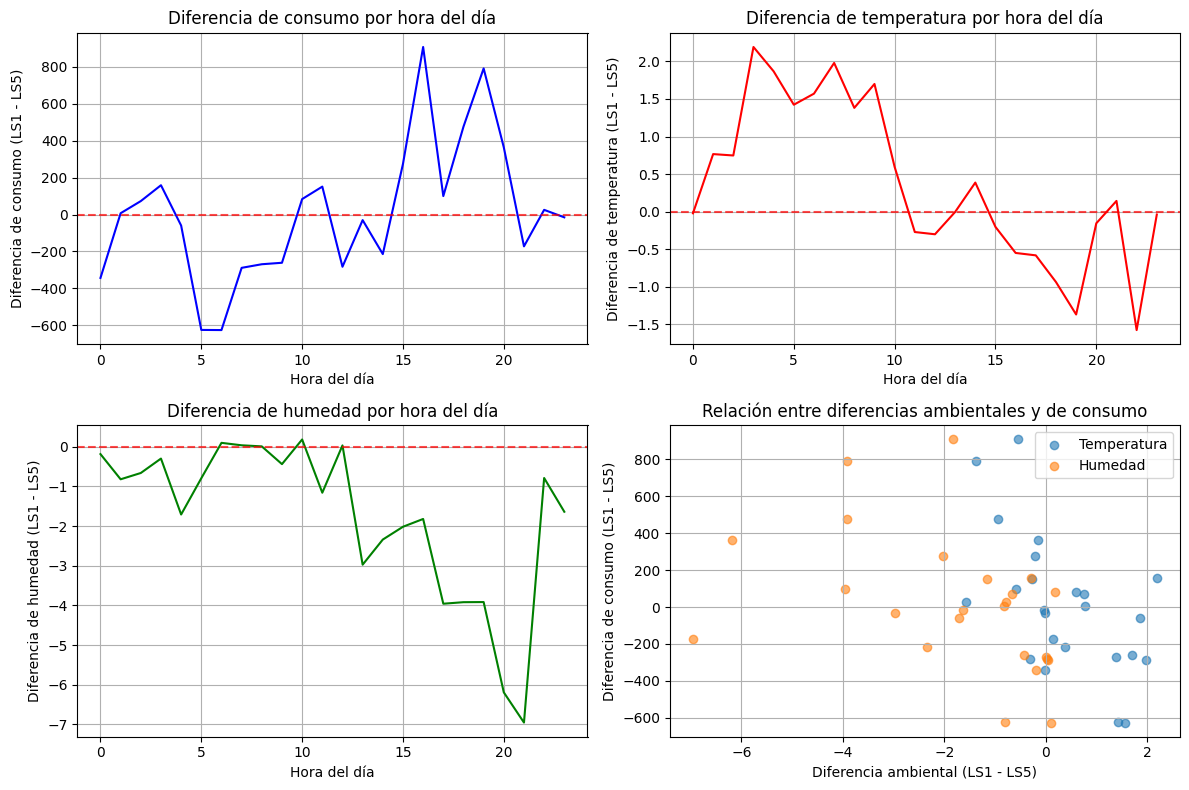


Sensibilidad al ambiente por comedero:
    ls  corr_temp  corr_moist  beta_temp  beta_moist  p_temp  p_moist
0  LS1     0.2043     -0.1865    59.6776    -18.6664  0.0002   0.0006
1  LS5    -0.0471      0.0566   -12.3863      7.1144  0.3999   0.3110


In [6]:
# Análisis adicional para comparar LS1 vs LS5
def analyze_consumption_difference(hourly_env, ts_daily, daily_full):
    # 1. Diferencia total de consumo
    total_consumption = hourly_env.groupby('ls')['grams_hour'].sum()
    consumption_diff = total_consumption['LS1'] - total_consumption['LS5']
    consumption_ratio = total_consumption['LS5'] / total_consumption['LS1']
    
    print(f"Diferencia total de consumo: LS1 - LS5 = {consumption_diff:.2f} gramos")
    print(f"LS5 consume {consumption_ratio*100:.1f}% de lo que consume LS1")
    
    # 2. Diferencias ambientales promedio
    env_stats = ts_daily.groupby('ls').agg({
        'temp_mean': ['mean', 'std'],
        'moist_mean': ['mean', 'std']
    }).round(2)
    
    print("\nEstadísticas ambientales promedio:")
    print(env_stats)
    
    # 3. Correlación entre diferencia ambiental y diferencia de consumo
    # Crear DataFrame con datos diarios de ambos comederos
    daily_pivot = daily_full.pivot_table(
        index='date', 
        columns='ls', 
        values=['grams_total', 'temperature', 'moisture']
    )
    
    # Calcular diferencias diarias
    daily_pivot['grams_diff'] = daily_pivot[('grams_total', 'LS1')] - daily_pivot[('grams_total', 'LS5')]
    daily_pivot['temp_diff'] = daily_pivot[('temperature', 'LS1')] - daily_pivot[('temperature', 'LS5')]
    daily_pivot['moist_diff'] = daily_pivot[('moisture', 'LS1')] - daily_pivot[('moisture', 'LS5')]
    
    # Correlaciones
    corr_temp = daily_pivot['grams_diff'].corr(daily_pivot['temp_diff'])
    corr_moist = daily_pivot['grams_diff'].corr(daily_pivot['moist_diff'])
    
    print(f"\nCorrelación entre diferencia de consumo y diferencia de temperatura: {corr_temp:.3f}")
    print(f"Correlación entre diferencia de consumo y diferencia de humedad: {corr_moist:.3f}")
    
    # 4. Regresión para explicar la diferencia de consumo
    X = daily_pivot[['temp_diff', 'moist_diff']].dropna()
    X = sm.add_constant(X)
    y = daily_pivot['grams_diff'].loc[X.index]
    
    if len(X) > 5:  # Mínimo de observaciones
        model = sm.OLS(y, X).fit()
        print("\nRegresión de la diferencia de consumo (LS1 - LS5) sobre diferencias ambientales:")
        print(model.summary())
    
    return {
        'total_consumption': total_consumption,
        'consumption_diff': consumption_diff,
        'consumption_ratio': consumption_ratio,
        'env_stats': env_stats,
        'daily_pivot': daily_pivot,
        'corr_temp': corr_temp,
        'corr_moist': corr_moist
    }

# Ejecutar el análisis
consumption_analysis = analyze_consumption_difference(hourly_env, ts_daily, daily_full)

# 5. Análisis por franjas horarias
def analyze_by_time_of_day(hourly_env):
    hourly_env['hour'] = pd.to_datetime(hourly_env['datehour']).dt.hour
    
    # Agrupar por hora del día y comedero
    hourly_stats = hourly_env.groupby(['ls', 'hour']).agg({
        'grams_hour': ['mean', 'std', 'count'],
        'temperature': 'mean',
        'moisture': 'mean'
    }).round(2)
    
    # Calcular diferencia por horas
    hourly_pivot = hourly_env.pivot_table(
        index='hour', 
        columns='ls', 
        values=['grams_hour', 'temperature', 'moisture']
    )
    
    hourly_pivot['grams_diff'] = hourly_pivot[('grams_hour', 'LS1')] - hourly_pivot[('grams_hour', 'LS5')]
    hourly_pivot['temp_diff'] = hourly_pivot[('temperature', 'LS1')] - hourly_pivot[('temperature', 'LS5')]
    hourly_pivot['moist_diff'] = hourly_pivot[('moisture', 'LS1')] - hourly_pivot[('moisture', 'LS5')]
    
    # Encontrar horas con mayor diferencia
    max_diff_hour = hourly_pivot['grams_diff'].idxmax()
    max_diff_value = hourly_pivot['grams_diff'].max()
    
    print(f"\nLa mayor diferencia de consumo ocurre a las {max_diff_hour:02d}:00 h")
    print(f"({max_diff_value:.2f} g/h más en LS1 que en LS5)")
    
    # Correlación por horas
    corr_hourly_temp = hourly_pivot['grams_diff'].corr(hourly_pivot['temp_diff'])
    corr_hourly_moist = hourly_pivot['grams_diff'].corr(hourly_pivot['moist_diff'])
    
    print(f"Correlación por horas entre diferencia de consumo y temperatura: {corr_hourly_temp:.3f}")
    print(f"Correlación por horas entre diferencia de consumo y humedad: {corr_hourly_moist:.3f}")
    
    return hourly_stats, hourly_pivot

hourly_stats, hourly_pivot = analyze_by_time_of_day(hourly_env)

# 6. Gráficas adicionales
plt.figure(figsize=(12, 8))

# Diferencia de consumo por horas
plt.subplot(2, 2, 1)
plt.plot(hourly_pivot.index, hourly_pivot['grams_diff'], 'b-', label='Diferencia de consumo')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Hora del día')
plt.ylabel('Diferencia de consumo (LS1 - LS5)')
plt.title('Diferencia de consumo por hora del día')
plt.grid(True)

# Diferencia de temperatura por horas
plt.subplot(2, 2, 2)
plt.plot(hourly_pivot.index, hourly_pivot['temp_diff'], 'r-', label='Diferencia de temperatura')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Hora del día')
plt.ylabel('Diferencia de temperatura (LS1 - LS5)')
plt.title('Diferencia de temperatura por hora del día')
plt.grid(True)

# Diferencia de humedad por horas
plt.subplot(2, 2, 3)
plt.plot(hourly_pivot.index, hourly_pivot['moist_diff'], 'g-', label='Diferencia de humedad')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Hora del día')
plt.ylabel('Diferencia de humedad (LS1 - LS5)')
plt.title('Diferencia de humedad por hora del día')
plt.grid(True)

# Relación entre diferencia ambiental y diferencia de consumo
plt.subplot(2, 2, 4)
plt.scatter(hourly_pivot['temp_diff'], hourly_pivot['grams_diff'], alpha=0.6, label='Temperatura')
plt.scatter(hourly_pivot['moist_diff'], hourly_pivot['grams_diff'], alpha=0.6, label='Humedad')
plt.xlabel('Diferencia ambiental (LS1 - LS5)')
plt.ylabel('Diferencia de consumo (LS1 - LS5)')
plt.title('Relación entre diferencias ambientales y de consumo')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 7. Análisis de sensibilidad al ambiente por comedero
def sensitivity_analysis(hourly_env):
    results = []
    for ls in ['LS1', 'LS5']:
        subset = hourly_env[hourly_env['ls'] == ls].copy()
        
        # Sensibilidad a la temperatura
        corr_temp = subset['grams_hour'].corr(subset['temperature'])
        # Sensibilidad a la humedad
        corr_moist = subset['grams_hour'].corr(subset['moisture'])
        
        # Regresión simple para cada variable
        X_temp = sm.add_constant(subset['temperature'])
        model_temp = sm.OLS(subset['grams_hour'], X_temp).fit()
        
        X_moist = sm.add_constant(subset['moisture'])
        model_moist = sm.OLS(subset['grams_hour'], X_moist).fit()
        
        results.append({
            'ls': ls,
            'corr_temp': corr_temp,
            'corr_moist': corr_moist,
            'beta_temp': model_temp.params['temperature'],
            'beta_moist': model_moist.params['moisture'],
            'p_temp': model_temp.pvalues['temperature'],
            'p_moist': model_moist.pvalues['moisture']
        })
    
    return pd.DataFrame(results)

sensitivity_df = sensitivity_analysis(hourly_env)
print("\nSensibilidad al ambiente por comedero:")
print(sensitivity_df.round(4))

**Conclusión**: LS1 consume más que LS5, y las diferencias de temperatura y humedad no explican el gap.

**Claves**:

- Gap total: +17.3 kg a favor de LS1. LS5 = 92.9% de LS1.

- Ambiente medio: LS1 ≈ +0.12 °C y −1.75 % HR vs LS5. Efecto de temperatura trivial (d≈0.07). Humedad moderadamente distinta (d≈0.5) pero no asociada al consumo.

- Correlaciones “diferencia consumo” vs “diferencia ambiente”: ρ(ΔT)=0.140, ρ(ΔHR)=−0.004 → ~0.

- Regresión Δconsumo ~ ΔT + ΔHR: R²=0.021, p=0.810 → sin relación estadística útil.

- Por hora del día: ρ(Δconsumo, ΔT)=−0.575 y ρ(Δconsumo, ΔHR)=−0.421 con N=24 y un outlier fuerte a las 16:00 (+908 g/h). Interpretación inestable.

- Dispersión consumo–T y consumo–HR: alta varianza y muchos valores bajos. No hay patrón monotónico claro.

- Ambientales promedio: LS1 algo más cálido y más seco, pero el mayor uso no aumenta con esas diferencias.

**Implicación**: el mayor uso de LS1 se debe a factores no ambientales medidos. Candidatos: recargas y resets, ubicación/accesibilidad, tráfico animal, eventos puntuales, mantenimiento.

Filas totales: 661 | Excluidas por recarga ±1h: 34 (5.1%)

OLS FE hora/día con HAC (dataset filtrado por recargas):


C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\3803884213.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ls, sub_h in df_h.sort_values("datehour").groupby("ls"):
C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\3803884213.py:54: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  left_on="datehour", right_on="time", direction="nearest", tolerance=pd.Timedelta("1H")
C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\3803884213.py:54: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  left_on="datehour", right_on="time", direction="nearest", tolerance=pd.Timedelta("1H")
C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\3803884213.py:76: FutureWarning: The default of observed=Fa

,ls,n,r2_adj,beta_temp,p_temp,beta_moist,p_moist,aic
0,LS1,319,0.181211,36.240016,0.145983,21.262753,0.066833,5107.894741
1,LS5,308,0.130756,21.780237,0.428536,-1.971860,0.884731,5007.080494



RLM Huber sobre g/h winsorizado 1%:


C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\3803884213.py:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_h_w["grams_hour_w"] = df_h_w.groupby("ls")["grams_hour"].transform(lambda s: winsorize_series(s, 0.01))
C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\3803884213.py:103: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ls, sub in df_h_w.groupby("ls"):


,ls,n,beta_temp,beta_moist
0,LS1,319,15.053323,8.430388
1,LS5,308,26.652411,4.650799



Selección de lag por AIC (mismo lag para T y HR):


C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\3803884213.py:128: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ls, sub in d0.groupby("ls"):


,ls,lag,aic,n,beta_T,beta_H
0,LS1,3,5056.217611,316,24.427673,-14.476877
1,LS5,3,4959.908873,305,31.572107,9.214957



Correlaciones balanceadas por hora:
{'rho_temp': -0.16118449288263398, 'rho_moist': -0.1679958580305968}

OLS balanceado (sin HAC):
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.9148     81.626     -0.575      0.566    -207.845     114.015
temp_diff    -92.6465     48.823     -1.898      0.059    -188.904       3.611
moist_diff   -48.3022     23.900     -2.021      0.045     -95.423      -1.182

Top picos y contexto (primeros 15 por LS):


C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\3803884213.py:158: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = df_h_excl.pivot_table(index="datehour", columns="ls", values=["grams_hour","temperature","moisture"], aggfunc="mean")
C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\3803884213.py:175: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ls, sub in df_h_nr.groupby("ls"):


,ls,datehour,grams_hour,near_refill,n_sessions_covering,grams_in_sessions
0,LS1,2025-07-16 16:00:00,6503.096793,False,0,0.000000
1,LS1,2025-08-04 19:00:00,3251.548396,False,0,0.000000
2,LS1,2025-08-03 18:00:00,3180.862562,False,0,0.000000
3,LS1,2025-08-02 16:00:00,3180.862562,False,1,1908.517537
4,LS1,2025-07-15 16:00:00,3110.176727,False,0,0.000000
5,LS1,2025-07-22 17:00:00,3039.490892,False,1,1201.659190
6,LS1,2025-08-05 19:00:00,2968.805058,False,0,0.000000
7,LS1,2025-07-22 16:00:00,2827.433388,False,1,1555.088364
8,LS1,2025-08-06 05:00:00,2756.747554,False,0,0.000000
9,LS1,2025-08-03 01:00:00,2615.375884,False,0,0.000000


C:\Users\alvar\AppData\Local\Temp\ipykernel_30540\3803884213.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ls, sub in df_h_excl.groupby("ls"):


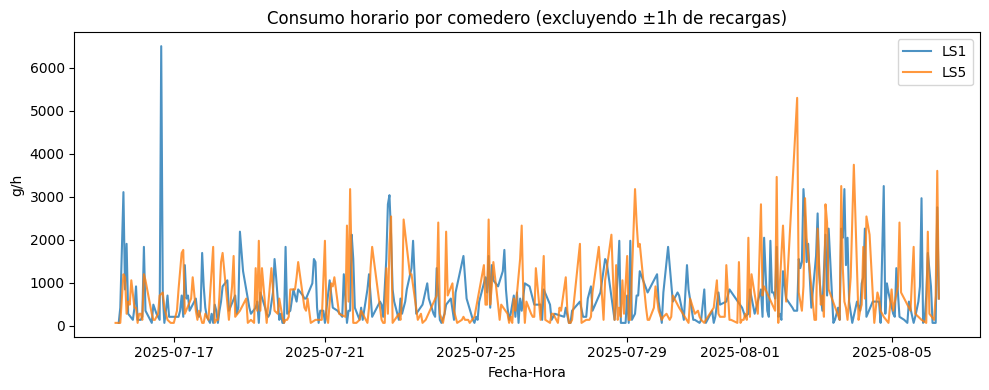

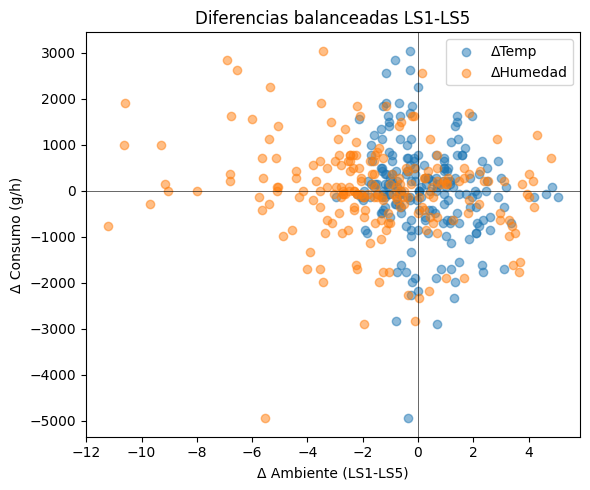


Efectos FE (HAC) por LS, dataset filtrado por recargas:


,ls,n,r2_adj,beta_temp,p_temp,beta_moist,p_moist,aic
0,LS1,319,0.1812,36.2400,0.1460,21.2628,0.0668,5107.8947
1,LS5,308,0.1308,21.7802,0.4285,-1.9719,0.8847,5007.0805



Resumen: winsorización + RLM (coeficientes):


,ls,n,beta_temp,beta_moist
0,LS1,319,15.0533,8.4304
1,LS5,308,26.6524,4.6508



Lags seleccionados por AIC:


,ls,lag,aic,n,beta_T,beta_H
0,LS1,3,5056.218,316,24.428,-14.477
1,LS5,3,4959.909,305,31.572,9.215


In [7]:
# %% Análisis avanzado LS1 vs LS5: control de recargas, FE por hora/día, robustez, lags, emparejado y diagnósticos
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ---------- PASO 0. Precondiciones y limpieza mínima ----------
req = {"hourly_env","ts_daily","daily_full","sessions","refills"}
missing = [r for r in req if r not in globals()]
if missing:
    raise RuntimeError(f"Faltan variables en memoria: {missing}")

df_h = hourly_env.copy()
df_h["datehour"] = pd.to_datetime(df_h["datehour"], errors="coerce")
df_h = df_h.dropna(subset=["datehour"])
df_h["ls"] = df_h["ls"].astype("category")
for c in ["grams_hour","temperature","moisture"]:
    df_h[c] = pd.to_numeric(df_h[c], errors="coerce")

ref = refills.copy()
ref["time"] = pd.to_datetime(ref["time"], errors="coerce")
ref = ref.dropna(subset=["time"])
ref["ls"] = ref["ls"].astype("category")

sess = sessions.copy()
for c in ["start","end"]:
    sess[c] = pd.to_datetime(sess[c], errors="coerce")
sess = sess.dropna(subset=["start","end"])
sess["ls"] = sess["ls"].astype("category")

# Utilidades
def winsorize_series(s: pd.Series, p=0.01):
    lo, hi = s.quantile(p), s.quantile(1-p)
    return s.clip(lo, hi)

def aic_from_fit(fit):
    try: return float(fit.aic)
    except Exception: return np.nan

# ---------- PASO 1. Control de recargas (máscara ±1h y flag) ----------
# merge_asof por LS para hallar la recarga más cercana en el tiempo
mask_rows = []
for ls, sub_h in df_h.sort_values("datehour").groupby("ls"):
    sub_r = ref[ref["ls"]==ls].sort_values("time")
    if len(sub_r)==0:
        tmp = sub_h.assign(
            nearest_refill=pd.NaT,
            minutes_to_refill=np.nan,
            near_refill=False
        )
    else:
        m = pd.merge_asof(
            sub_h[["datehour"]].sort_values("datehour"),
            sub_r[["time"]].sort_values("time"),
            left_on="datehour", right_on="time", direction="nearest", tolerance=pd.Timedelta("1H")
        )
        tmp = sub_h.copy()
        tmp["nearest_refill"] = m["time"].values
        tmp["minutes_to_refill"] = (tmp["datehour"] - tmp["nearest_refill"]).dt.total_seconds()/60.0
        tmp["near_refill"] = tmp["minutes_to_refill"].abs() <= 60
    mask_rows.append(tmp)
df_h_nr = pd.concat(mask_rows, ignore_index=True)

# Versión filtrada excluyendo ±1h de recarga
df_h_excl = df_h_nr.loc[~df_h_nr["near_refill"]].copy()

print(f"Filas totales: {len(df_h_nr):,} | Excluidas por recarga ±1h: {df_h_nr['near_refill'].sum():,} "
      f"({100*df_h_nr['near_refill'].mean():.1f}%)")

# ---------- PASO 2. Modelo con efectos por hora y día, SE Newey-West ----------
def fit_fe_by_ls(data: pd.DataFrame, use_excluded=True):
    out = []
    d = data.copy()
    d = d.dropna(subset=["grams_hour","temperature","moisture","datehour"])
    d["hod"] = d["datehour"].dt.hour.astype("int16")
    d["date"] = d["datehour"].dt.date.astype("object")  # FE de día vía C(date)
    for ls, sub in d.groupby("ls"):
        if len(sub) < 30:
            out.append({"ls":ls, "n":len(sub), "r2_adj":np.nan, "beta_temp":np.nan, "p_temp":np.nan,
                        "beta_moist":np.nan, "p_moist":np.nan})
            continue
        # Fórmula con FE por hora y día
        fml = "grams_hour ~ temperature + moisture + C(hod) + C(date)"
        fit = smf.ols(fml, data=sub).fit(cov_type="HAC", cov_kwds={"maxlags":3})
        out.append({
            "ls": ls, "n": int(fit.nobs), "r2_adj": float(fit.rsquared_adj),
            "beta_temp": float(fit.params.get("temperature", np.nan)),
            "p_temp": float(fit.pvalues.get("temperature", np.nan)),
            "beta_moist": float(fit.params.get("moisture", np.nan)),
            "p_moist": float(fit.pvalues.get("moisture", np.nan)),
            "aic": aic_from_fit(fit)
        })
    return pd.DataFrame(out)

print("\nOLS FE hora/día con HAC (dataset filtrado por recargas):")
fe_excl = fit_fe_by_ls(df_h_excl)
display(fe_excl)

# ---------- PASO 3. Robustez: winsorizar 1% y RLM (Huber) ----------
df_h_w = df_h_excl.copy()
df_h_w["grams_hour_w"] = df_h_w.groupby("ls")["grams_hour"].transform(lambda s: winsorize_series(s, 0.01))

robust_rows = []
for ls, sub in df_h_w.groupby("ls"):
    sub = sub.dropna(subset=["grams_hour_w","temperature","moisture","datehour"])
    sub["hod"] = sub["datehour"].dt.hour.astype("int16")
    # Matriz explícita sin FE de día para RLM (RLM no acepta patsy con C(date) de forma eficiente)
    X = pd.get_dummies(sub["hod"], prefix="h", drop_first=True)
    X = pd.concat([sub[["temperature","moisture"]].astype(float), X.astype(float)], axis=1)
    X = sm.add_constant(X, has_constant="add")
    y = sub["grams_hour_w"].astype(float)
    if len(y) < X.shape[1] + 5:
        robust_rows.append({"ls":ls,"n":len(y),"beta_temp":np.nan,"beta_moist":np.nan})
        continue
    rfit = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
    robust_rows.append({
        "ls": ls, "n": int(rfit.nobs),
        "beta_temp": float(rfit.params.get("temperature", np.nan)),
        "beta_moist": float(rfit.params.get("moisture", np.nan))
    })
robust_tbl = pd.DataFrame(robust_rows)
print("\nRLM Huber sobre g/h winsorizado 1%:")
display(robust_tbl)

# ---------- PASO 4. Lags 1–3 y selección por AIC ----------
def try_lags_by_ls(data: pd.DataFrame, max_lag=3):
    results = []
    d0 = data.dropna(subset=["grams_hour","temperature","moisture","datehour"]).copy()
    for ls, sub in d0.groupby("ls"):
        sub = sub.sort_values("datehour")
        # Generar lags dentro de LS
        for k in range(0, max_lag+1):
            sub[f"T_l{k}"] = sub["temperature"].shift(k)
            sub[f"H_l{k}"] = sub["moisture"].shift(k)
        # Probar combinaciones 0..max_lag (mismo lag para T y H por simplicidad)
        best = {"ls":ls, "lag":None, "aic":np.inf, "n":0, "beta_T":np.nan, "beta_H":np.nan}
        for k in range(0, max_lag+1):
            X = sub[[f"T_l{k}", f"H_l{k}"]].copy()
            X.columns = ["temperature","moisture"]
            tmp = pd.concat([sub[["grams_hour","datehour"]], X], axis=1).dropna()
            if len(tmp) < 30: 
                continue
            tmp["hod"] = tmp["datehour"].dt.hour.astype("int16")
            tmp["date"] = tmp["datehour"].dt.date.astype("object")
            fit = smf.ols("grams_hour ~ temperature + moisture + C(hod) + C(date)", data=tmp)\
                     .fit(cov_type="HAC", cov_kwds={"maxlags":3})
            if fit.aic < best["aic"]:
                best.update({"lag":k, "aic":float(fit.aic), "n":int(fit.nobs),
                             "beta_T":float(fit.params.get("temperature", np.nan)),
                             "beta_H":float(fit.params.get("moisture", np.nan))})
        results.append(best)
    return pd.DataFrame(results)

lags_tbl = try_lags_by_ls(df_h_excl, max_lag=3)
print("\nSelección de lag por AIC (mismo lag para T y HR):")
display(lags_tbl)

# ---------- PASO 5. Comparación balanceada LS1 vs LS5 (mismas horas) ----------
pvt = df_h_excl.pivot_table(index="datehour", columns="ls", values=["grams_hour","temperature","moisture"], aggfunc="mean")
pvt = pvt.dropna(subset=[("grams_hour","LS1"),("grams_hour","LS5")])  # emparejado exacto
pvt["grams_diff"] = pvt[("grams_hour","LS1")] - pvt[("grams_hour","LS5")]
pvt["temp_diff"]  = pvt[("temperature","LS1")] - pvt[("temperature","LS5")]
pvt["moist_diff"] = pvt[("moisture","LS1")]   - pvt[("moisture","LS5")]

print("\nCorrelaciones balanceadas por hora:")
print({"rho_temp": float(pvt["grams_diff"].corr(pvt["temp_diff"])),
       "rho_moist": float(pvt["grams_diff"].corr(pvt["moist_diff"]))})

fit_bal = smf.ols("grams_diff ~ temp_diff + moist_diff", data=pvt.dropna()).fit()
print("\nOLS balanceado (sin HAC):")
print(fit_bal.summary().tables[1])

# ---------- PASO 6. Diagnóstico de picos y relación con refills/sesiones ----------
# Top outliers por LS
diag_rows = []
for ls, sub in df_h_nr.groupby("ls"):
    sub = sub.sort_values("grams_hour", ascending=False).head(15)
    for _, r in sub.iterrows():
        near = bool(r.get("near_refill", False))
        diag_rows.append({"ls":ls, "datehour":r["datehour"], "grams_hour":r["grams_hour"], "near_refill":near})
diag = pd.DataFrame(diag_rows)

# Vincular a sesiones que cubren esa hora
def sessions_covering(ts: pd.Timestamp, ls):
    s = sess[(sess["ls"]==ls) & (sess["start"]<=ts) & (sess["end"]>=ts)]
    return len(s), float(s["grams"].sum()) if len(s) else 0.0

diag["n_sessions_covering"] = diag.apply(lambda r: sessions_covering(r["datehour"], r["ls"])[0], axis=1)
diag["grams_in_sessions"]   = diag.apply(lambda r: sessions_covering(r["datehour"], r["ls"])[1], axis=1)

print("\nTop picos y contexto (primeros 15 por LS):")
display(diag)

# ---------- Gráficos mínimos de este bloque ----------
plt.figure(figsize=(10,4))
for ls, sub in df_h_excl.groupby("ls"):
    sub = sub.sort_values("datehour")
    plt.plot(sub["datehour"], sub["grams_hour"], label=ls, alpha=0.8)
plt.title("Consumo horario por comedero (excluyendo ±1h de recargas)")
plt.xlabel("Fecha-Hora"); plt.ylabel("g/h"); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,5))
plt.scatter(pvt["temp_diff"], pvt["grams_diff"], alpha=0.5, label="ΔTemp")
plt.scatter(pvt["moist_diff"], pvt["grams_diff"], alpha=0.5, label="ΔHumedad")
plt.axhline(0, color="k", lw=0.7, alpha=0.6); plt.axvline(0, color="k", lw=0.7, alpha=0.6)
plt.title("Diferencias balanceadas LS1-LS5")
plt.xlabel("Δ Ambiente (LS1-LS5)"); plt.ylabel("Δ Consumo (g/h)")
plt.legend(); plt.tight_layout(); plt.show()

# Efectos estimados con FE (tabla compacta)
print("\nEfectos FE (HAC) por LS, dataset filtrado por recargas:")
display(fe_excl[["ls","n","r2_adj","beta_temp","p_temp","beta_moist","p_moist","aic"]].round(4))
print("\nResumen: winsorización + RLM (coeficientes):")
display(robust_tbl.round(4))
print("\nLags seleccionados por AIC:")
display(lags_tbl.round(3))
